In [1]:
from warnings import filterwarnings
filterwarnings('ignore')
import pandas as pd
pd.set_option('display.max_columns',20)
pd.set_option('display.max_rows',100)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv('C:/Users/Lenovo/Downloads/Datasets/Titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.shape

(891, 12)

In [4]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
train = train.drop(labels=['Name','Ticket','Cabin','PassengerId','Fare'],axis=1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [6]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')

In [7]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,NaN,1,2,S
889,1,1,male,26.0,0,0,C


In [8]:
def replacer(df):
    import pandas as pd
    Q = pd.DataFrame(df.isna().sum(),columns=["ct"])
    for i in Q[Q.ct > 0].index:
        if(df[i].dtypes == "object"):
            x = df[i].mode()[0]
            df[i] = df[i].fillna(x)
        else:
            x = df[i].mean()
            df[i] = df[i].fillna(x)

In [9]:
replacer(train)

In [10]:
train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [11]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')

In [12]:
a = train[['Survived', 'Pclass', 'Sex','Embarked']]
for i in a:
    print(a[i].value_counts())
    print('----------------------------------')

0    549
1    342
Name: Survived, dtype: int64
----------------------------------
3    491
1    216
2    184
Name: Pclass, dtype: int64
----------------------------------
male      577
female    314
Name: Sex, dtype: int64
----------------------------------
S    646
C    168
Q     77
Name: Embarked, dtype: int64
----------------------------------


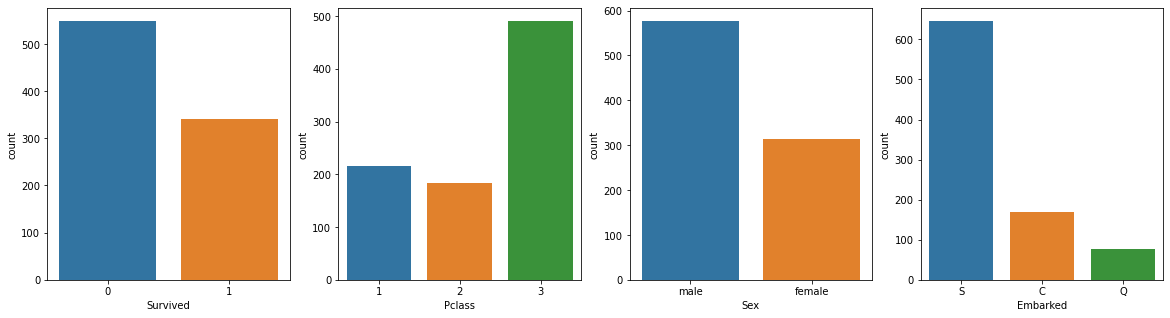

In [13]:
plt.figure(figsize=(20,5))
n=1
for i in a:
    plt.subplot(1,4,n)
    sns.countplot(x = i, data = train)
    n = n + 1

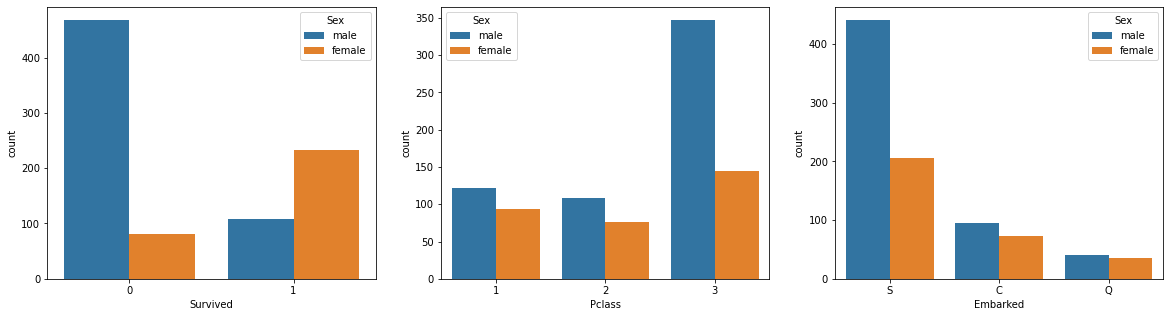

In [14]:
plt.figure(figsize=(20,5))
n=1
for i in ['Survived','Pclass','Embarked']:
    plt.subplot(1,3,n)
    sns.countplot(x = i, data = train, hue='Sex')
    n = n + 1

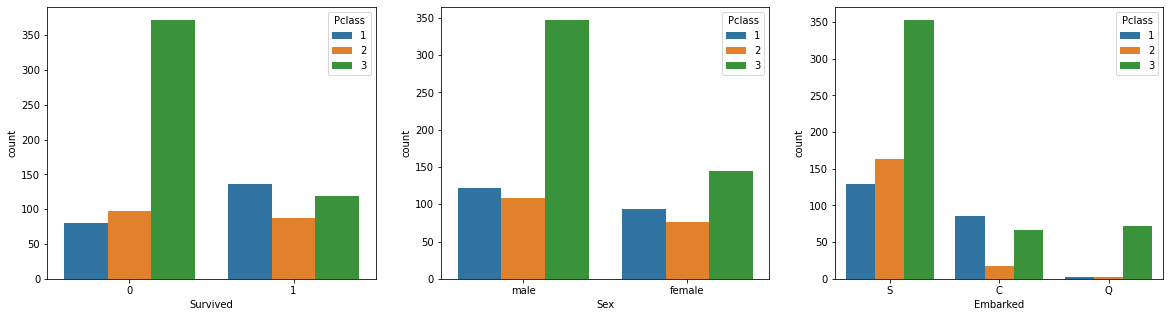

In [15]:
plt.figure(figsize=(20,5))
n=1
for i in ['Survived','Sex','Embarked']:
    plt.subplot(1,3,n)
    sns.countplot(x = i, data = train, hue='Pclass')
    n = n + 1

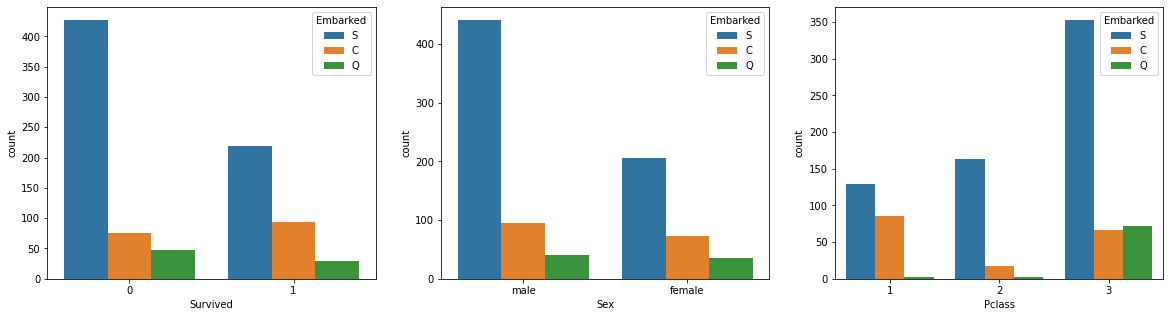

In [16]:
plt.figure(figsize=(20,5))
n=1
for i in ['Survived','Sex','Pclass']:
    plt.subplot(1,3,n)
    sns.countplot(x = i, data = train, hue='Embarked')
    n = n + 1

<AxesSubplot:xlabel='Age', ylabel='Density'>

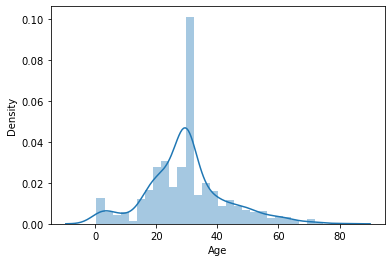

In [17]:
sns.distplot(train['Age'])

In [18]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [19]:
y = train[['Survived']]
x = train.drop(labels=['Survived'],axis=1)

In [20]:
cat, con = catconsep(x)

In [21]:
x['Sex']= x['Sex'].replace({'male':1, 'female':0})
x['Embarked']= x['Embarked'].replace({'S':1, 'C':0, 'Q':2})

In [22]:
x

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,22.000000,1,0,1
1,1,0,38.000000,1,0,0
2,3,0,26.000000,0,0,1
3,1,0,35.000000,1,0,1
4,3,1,35.000000,0,0,1
...,...,...,...,...,...,...
886,2,1,27.000000,0,0,1
887,1,0,19.000000,0,0,1
888,3,0,29.699118,1,2,1
889,1,1,26.000000,0,0,0


<AxesSubplot:>

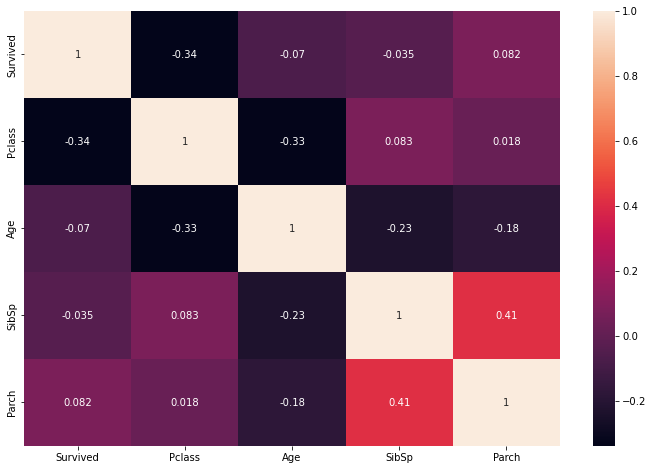

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(),annot=True)

In [24]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=6)

In [44]:
RS = 6   # random state
dtc_MD = 5    # max depth
dtc_ML = 3  # min samples leaf
dtc_MS = 3   # min samples split

rfc_MD = 4   # max depth
rfc_ML = 7   # min samples leaf
rfc_MS = 7   # min samples split

# 1. LogisticRegression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
log_model = logreg.fit(xtrain,ytrain)
pred_test = log_model.predict(xtest)
pred_train = log_model.predict(xtrain)

from sklearn.metrics import accuracy_score
print('LogisticRegression')
print('training accuracy : ',round(accuracy_score(ytrain,pred_train),3))
print('testing accuracy : ',round(accuracy_score(ytest,pred_test),3))
print('--------------------------------------------')

# 2. DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=RS)
dtc_model = dtc.fit(xtrain,ytrain)
pred_train = dtc_model.predict(xtrain)
pred_test = dtc_model.predict(xtest)

from sklearn.metrics import accuracy_score
print('DecisionTreeClassifier')
print('training_accuracy: ',round(accuracy_score(ytrain,pred_train),3))
print('testing_accuracy:  ', round(accuracy_score(ytest,pred_test),3))
print('----------------------------------------------------')


# dtc -- max_depth
dtc = DecisionTreeClassifier(random_state=RS,max_depth=dtc_MD)
dtc_model = dtc.fit(xtrain,ytrain)
pred_test=dtc_model.predict(xtest)
pred_train=dtc_model.predict(xtrain)

print('DecisionTreeClassifier : max_depth ')
print('Test  :   ',round(accuracy_score(ytest,pred_test),3))
print('Train :   ',round(accuracy_score(ytrain,pred_train),3))
print('----------------------------------------------------')

# dtc -- min_samples_leaf
dtc = DecisionTreeClassifier(random_state=RS, min_samples_leaf=dtc_ML)
dtc_model = dtc.fit(xtrain,ytrain)
pred_test=dtc_model.predict(xtest)
pred_train=dtc_model.predict(xtrain)

print('DecisionTreeClassifier: min_samples_leaf')
print('Test  :   ',round(accuracy_score(ytest,pred_test),3))
print('Train :   ',round(accuracy_score(ytrain,pred_train),3))
print('----------------------------------------------------')


# dtr -- min_samples_split
dtc = DecisionTreeClassifier(random_state=RS,min_samples_split=dtc_MS)
dtc_model = dtc.fit(xtrain,ytrain)
pred_test=dtc_model.predict(xtest)
pred_train=dtc_model.predict(xtrain)

print('DecisionTreeClassifier : max_depth ')
print('Test  :   ',round(accuracy_score(ytest,pred_test),3))
print('Train :   ',round(accuracy_score(ytrain,pred_train),3))
print('----------------------------------------------------')


# 3. RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=RS)
rfc_model = rfc.fit(xtrain,ytrain)
pred_train = dtc_model.predict(xtrain)
pred_test = dtc_model.predict(xtest)

from sklearn.metrics import accuracy_score
print('RandomForestClassifier')
print('training_accuracy: ',round(accuracy_score(ytrain,pred_train),3))
print('testing_accuracy:  ', round(accuracy_score(ytest,pred_test),3))
print('----------------------------------------------------')

# rfc--- max_depth
rfc = RandomForestClassifier(random_state=RS, max_depth=rfc_MD)
rfc_model = rfc.fit(xtrain,ytrain)
pred_train = dtc_model.predict(xtrain)
pred_test = dtc_model.predict(xtest)

from sklearn.metrics import accuracy_score
print('RandomForestClassifier: max_depth')
print('training_accuracy: ',round(accuracy_score(ytrain,pred_train),3))
print('testing_accuracy:  ', round(accuracy_score(ytest,pred_test),3))
print('----------------------------------------------------')


# rfc ---- min_samples_leaf
rfc = RandomForestClassifier(random_state=RS, min_samples_leaf=rfc_ML)
rfc_model = rfc.fit(xtrain,ytrain)
pred_train = dtc_model.predict(xtrain)
pred_test = dtc_model.predict(xtest)

from sklearn.metrics import accuracy_score
print('RandomForestClassifier: min_samples_leaf')
print('training_accuracy: ',round(accuracy_score(ytrain,pred_train),3))
print('testing_accuracy:  ', round(accuracy_score(ytest,pred_test),3))
print('----------------------------------------------------')


# rfc ---- min_samples_split
rfc = RandomForestClassifier(random_state=RS, min_samples_split=rfc_MS)
rfc_model = rfc.fit(xtrain,ytrain)
pred_train = dtc_model.predict(xtrain)
pred_test = dtc_model.predict(xtest)

from sklearn.metrics import accuracy_score
print('RandomForestClassifier: min_samples_split')
print('training_accuracy: ',round(accuracy_score(ytrain,pred_train),3))
print('testing_accuracy:  ', round(accuracy_score(ytest,pred_test),3))
print('----------------------------------------------------')

LogisticRegression
training accuracy :  0.788
testing accuracy :  0.821
--------------------------------------------
DecisionTreeClassifier
training_accuracy:  0.934
testing_accuracy:   0.816
----------------------------------------------------
DecisionTreeClassifier : max_depth 
Test  :    0.86
Train :    0.836
----------------------------------------------------
DecisionTreeClassifier: min_samples_leaf
Test  :    0.821
Train :    0.872
----------------------------------------------------
DecisionTreeClassifier : max_depth 
Test  :    0.832
Train :    0.92
----------------------------------------------------
RandomForestClassifier
training_accuracy:  0.92
testing_accuracy:   0.832
----------------------------------------------------
RandomForestClassifier: max_depth
training_accuracy:  0.92
testing_accuracy:   0.832
----------------------------------------------------
RandomForestClassifier: min_samples_leaf
training_accuracy:  0.92
testing_accuracy:   0.832
--------------------------

In [26]:
  # Find best random_state value

rs = []
for i in range(1,50,1):
    xtrain,xtest, ytrain,ytest = train_test_split(x,y, random_state=i, test_size=0.2)
    logreg = LogisticRegression()
    model = logreg.fit(xtrain,ytrain)
    pred_test = model.predict(xtest)
    pred_train = model.predict(xtrain)
    from sklearn.metrics import accuracy_score
    print("--------",i,"------------")
    print('LogisticRegression')
    print('training accuracy : ',round(accuracy_score(ytrain,pred_train),3))
    print('testing accuracy : ',round(accuracy_score(ytest,pred_test),3))
print('########################################################')  

-------- 1 ------------
LogisticRegression
training accuracy :  0.787
testing accuracy :  0.793
-------- 2 ------------
LogisticRegression
training accuracy :  0.808
testing accuracy :  0.771
-------- 3 ------------
LogisticRegression
training accuracy :  0.801
testing accuracy :  0.76
-------- 4 ------------
LogisticRegression
training accuracy :  0.782
testing accuracy :  0.844
-------- 5 ------------
LogisticRegression
training accuracy :  0.788
testing accuracy :  0.821
-------- 6 ------------
LogisticRegression
training accuracy :  0.779
testing accuracy :  0.866
-------- 7 ------------
LogisticRegression
training accuracy :  0.803
testing accuracy :  0.754
-------- 8 ------------
LogisticRegression
training accuracy :  0.815
testing accuracy :  0.765
-------- 9 ------------
LogisticRegression
training accuracy :  0.81
testing accuracy :  0.765
-------- 10 ------------
LogisticRegression
training accuracy :  0.789
testing accuracy :  0.81
-------- 11 ------------
LogisticRegressio

In [27]:
from sklearn.model_selection import GridSearchCV
for i in ["max_depth", "min_samples_leaf", "min_samples_leaf"]:
    dtc = DecisionTreeClassifier(random_state=6)
    tg = {i:range(2,50,1)}
    cv = GridSearchCV(dtc, tg, scoring='accuracy', cv= 4)
    cv_model = cv.fit(xtrain,ytrain)
    print(cv_model.best_params_)

{'max_depth': 5}
{'min_samples_leaf': 3}
{'min_samples_leaf': 3}


In [28]:
for i in ["max_depth", "min_samples_leaf", "min_samples_leaf"]:
    rfc = RandomForestClassifier(random_state=6)
    tg = {i:range(2,50,1)}
    cv = GridSearchCV(rfc, tg, scoring='accuracy', cv= 4)
    cv_model = cv.fit(xtrain,ytrain)
    print(cv_model.best_params_)

{'max_depth': 4}
{'min_samples_leaf': 7}
{'min_samples_leaf': 7}


# TEST

In [29]:
test=pd.read_csv('C:/Users/Lenovo/Downloads/Datasets/Titanic/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [30]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [31]:
test = test.drop(labels=['PassengerId','Name','Ticket','Fare','Cabin'],axis=1)

In [32]:
test['Sex']= test['Sex'].replace({'male':1, 'female':0})
test['Embarked']= test['Embarked'].replace({'S':1, 'C':0, 'Q':2})

In [33]:
test

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,34.5,0,0,2
1,3,0,47.0,1,0,1
2,2,1,62.0,0,0,2
3,3,1,27.0,0,0,1
4,3,0,22.0,1,1,1
...,...,...,...,...,...,...
413,3,1,NaN,0,0,1
414,1,0,39.0,0,0,0
415,3,1,38.5,0,0,1
416,3,1,NaN,0,0,1


In [34]:
test.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Embarked     0
dtype: int64

In [36]:
replacer(test)

In [37]:
test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [38]:
test.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')

In [39]:
xtrain.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')

# Prediction on test data

In [40]:
test['pred'] = log_model.predict(test)

In [41]:
test

,Pclass,Sex,Age,SibSp,Parch,Embarked,pred
0,3,1,34.50000,0,0,2,0
1,3,0,47.00000,1,0,1,0
2,2,1,62.00000,0,0,2,0
3,3,1,27.00000,0,0,1,0
4,3,0,22.00000,1,1,1,1
...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,1,0
414,1,0,39.00000,0,0,0,1
415,3,1,38.50000,0,0,1,0
416,3,1,30.27259,0,0,1,0
